<a href="https://colab.research.google.com/github/gdemerges/simplon_exercices/blob/master/1_Prediction_immo_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etude du prix de l'immobilier à Boston avec Seaborn

Pour cet exercice, vous devrez reproduire et retrouver les lignes de commandes qui ont permis d'obtenir les visualisations affichées.

## Import du dataset

Importation des librairies nécessaires

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns

Affichage du dataset

In [ ]:
from sklearn import datasets
data = datasets.fetch_california_housing()

In [ ]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
dataset = pd.DataFrame(columns=data["feature_names"], data=data.data)
dataset = pd.concat([dataset,pd.DataFrame({"Price":data.target})], axis=1)
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Visualisation en diagramme en barres

Regarder la documentation concernant la fonction set() de Seaborn et comment la paramétrer afin d'avoir des tailles de visualisation correcte.

In [ ]:
sns.set(style="whitegrid")

<ipython-input-15-30a40d816af8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, y='HouseAge', palette ='Set3')


<Axes: xlabel='count', ylabel='HouseAge'>

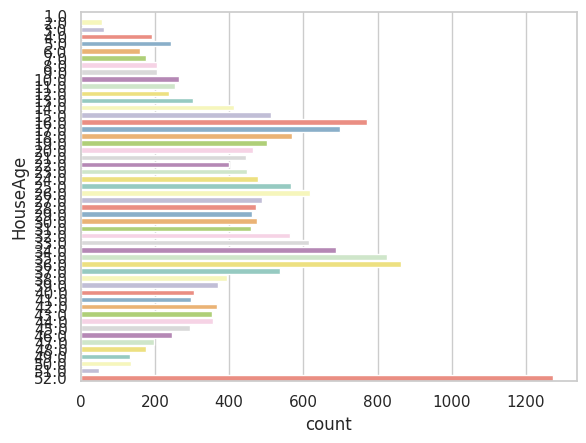

In [ ]:
dataset['MedHouseVal'] = data.target
sns.countplot(data=dataset, y='HouseAge', palette ='Set3')

Création de la colonne AgeGroup qui découpe la colonne Age en tranche d'age en 5 catégories (détaillées dans la commande de résultat)

<ipython-input-21-809ffd522311>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, y='AgeGroup', palette = "Set1")


<Axes: xlabel='count', ylabel='AgeGroup'>

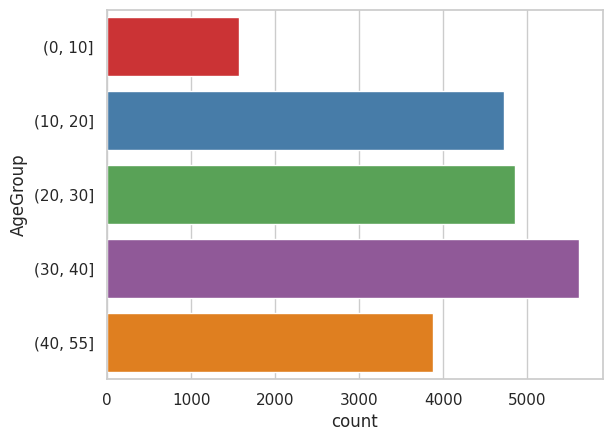

In [ ]:
bins = [0, 10, 20, 30, 40, 55]
dataset['AgeGroup'] = pd.cut(dataset['HouseAge'], bins=bins)
sns.countplot(data=dataset, y='AgeGroup', palette = "Set1")

## Visualisation en boite à moustaches

<Axes: xlabel='Price'>

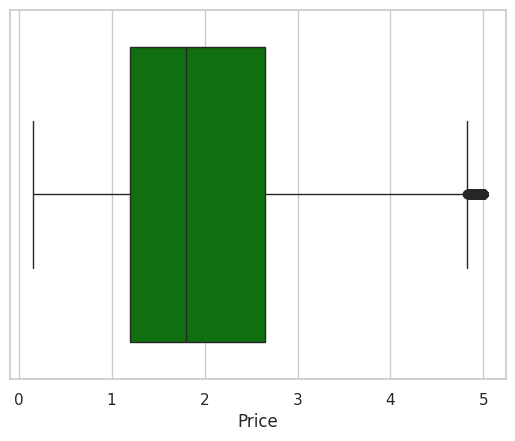

In [ ]:
sns.boxplot(x=dataset["Price"], color = 'green')

<Axes: xlabel='AgeGroup', ylabel='Price'>

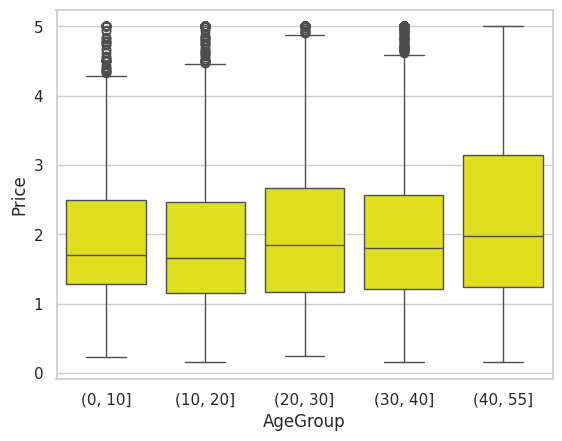

In [ ]:
sns.boxplot(data=dataset, x="AgeGroup", y="Price", color = 'yellow')

## Visualisation en nuage de point

<ipython-input-22-5f2323a9d66e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="AgeGroup", y="AveRooms", jitter=False, data=dataset, palette = "ch:.25" )


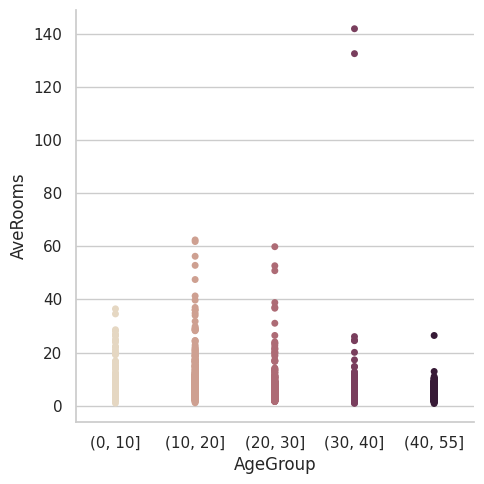

In [ ]:
sns.catplot(x="AgeGroup", y="AveRooms", jitter=False, data=dataset, palette = "ch:.25" )

<Axes: xlabel='Price', ylabel='AveBedrms'>

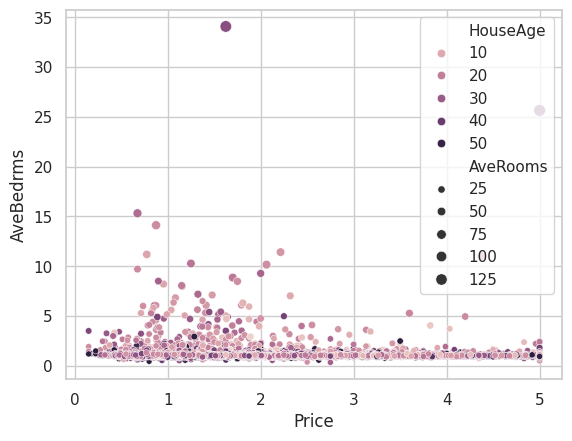

In [ ]:
sns.scatterplot(data=dataset, x="Price", y="AveBedrms", hue="HouseAge", size="AveRooms")


On créé un nouveau dataset, qu'on nommera dataset_2 qui récupère seulement les données pour lesquels le nombre de chambre (AveBedrms) est inférieur strictement à 5.

In [ ]:
dataset_2 = dataset.loc[dataset['AveBedrms'] < 5]
dataset_2.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,MedHouseVal,AgeGroup,AgeGroupID
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526,"(40, 55]",4
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585,"(20, 30]",2
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521,"(40, 55]",4
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413,"(40, 55]",4
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422,"(40, 55]",4


<Axes: xlabel='Price', ylabel='AveBedrms'>

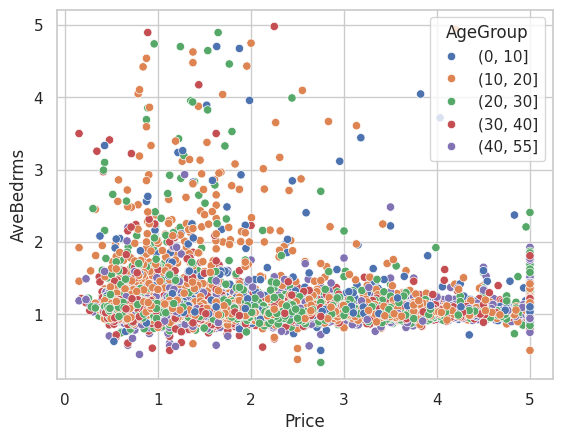

In [ ]:
sns.scatterplot(data=dataset_2, x="Price", y="AveBedrms", hue="AgeGroup")

[texte du lien](https://)## Visualisation globale de l'ensemble des variables

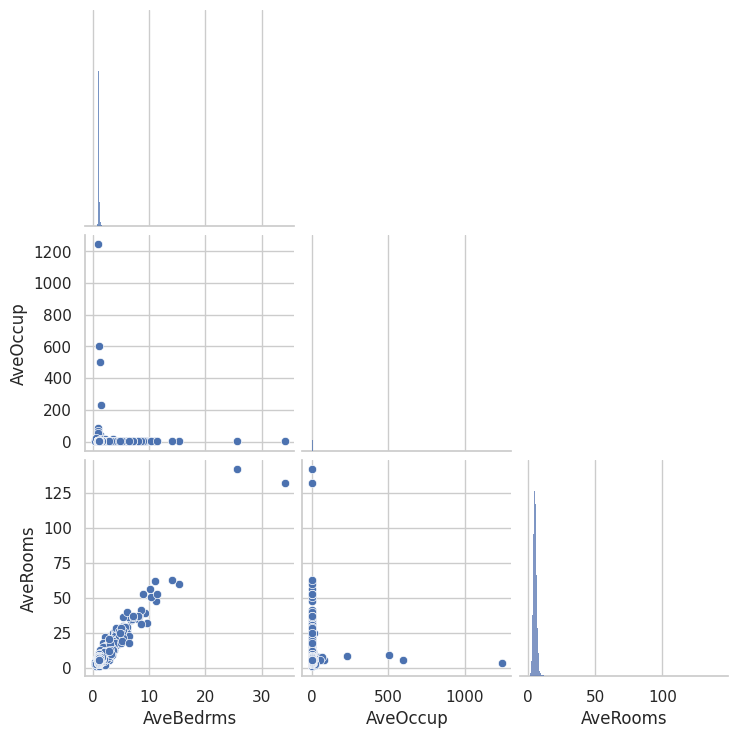

In [ ]:
import matplotlib.pyplot as plt
sns.pairplot(dataset, vars=["AveBedrms", "AveOccup", "AveRooms"], corner = True)
plt.show()

Qu'est-ce que vous voyez ?